### Graphs of Odds, Logit and Sigmoid

### Graphs of Odds and Logit

Text(0.5, 0, 'Probability')

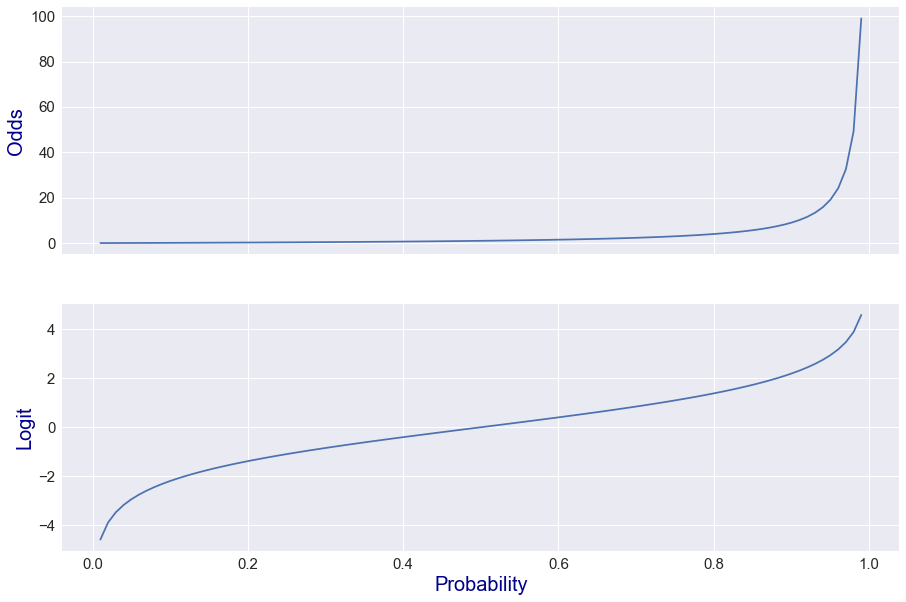

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn')

p_np = np.linspace(0.01, 0.99, 100)
p_tf = tf.linspace(0.01, 0.99, 100)

odds_np = p_np / (1 - p_np)
odds_tf = p_tf / (1 - p_tf)

logit_np = np.log(odds_np)
logit_tf = tf.math.log(odds_tf)

fig, axes = plt.subplots(2, 1, figsize=(15, 10),
sharex=True)
axes[0].plot(p_np, odds_np)
axes[1].plot(p_np, logit_np)

xticks = np.arange(0, 1.1, 0.2)
axes[0].tick_params(labelsize=15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel('Odds', fontsize=20, color='darkblue')
axes[1].tick_params(labelsize=15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel('Logit', fontsize=20, color='darkblue')
axes[1].set_xlabel('Probability', fontsize=20, color='darkblue')

### Graph of Sigmoid

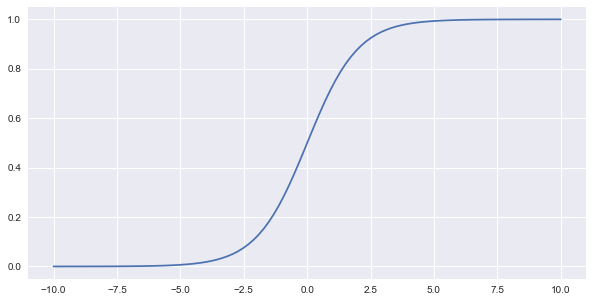

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x = tf.linspace(-10, 10, 100)
sigmoid = Activation('sigmoid')(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x.numpy(), sigmoid.numpy())

### Logistic Regression Models

### Single-variate Logistic Regression Models

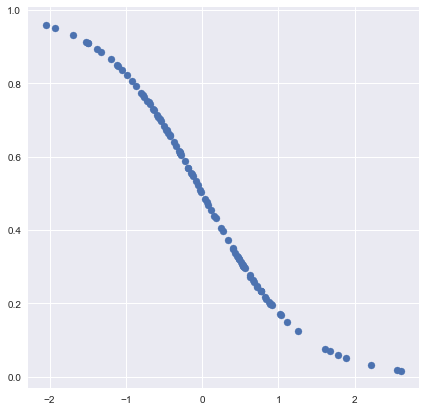

In [21]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x = tf.random.normal(shape=(100, 1))
dense = Dense(units=1, activation='sigmoid')

y = dense(x)
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x.numpy(), y.numpy())

### Multi-variate Logistic Regression Models

In [23]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x = tf.random.normal(shape=(100, 5))
dense = Dense(units=1, activation='sigmoid')

y = dense(x)
print(y.shape)
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.scatter(x.numpy(), y.numpy())

(100, 1)


### Binary Classifier with Dense Layers


In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

### Softmax Layers

### IO of Softmax

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

logit = tf.random.uniform(shape=(2, 5), minval=-10, maxval=10)

softmax_value = Activation('softmax')(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis=1)
print('Logits: \n', logit.numpy())
print('Softmax: \n', softmax_value.numpy())
print('SoftmaxSum: \n', softmax_sum.numpy())

Logits: 
 [[-3.4119368   0.40713787 -4.3877554   8.827309    7.2823296 ]
 [-2.3867536   9.665049    5.9841995   6.8412857   6.0861244 ]]
Softmax: 
 [[3.9857309e-06 1.8159798e-04 1.5021570e-06 8.2403320e-01 1.7577974e-01]
 [5.2440987e-06 8.9888030e-01 2.2653194e-02 5.3377371e-02 2.5083888e-02]]
SoftmaxSum: 
 [1. 1.]


### Softmax in Dense Layers

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

logit = tf.random.uniform(shape=(2, 5), minval=-10, maxval=10)
dense = Dense(units=8, activation='softmax')
y = dense(logit)
print(tf.reduce_sum(y, axis=1))

tf.Tensor([1.        0.9999999], shape=(2,), dtype=float32)


### Multi-class Classifiers

In [32]:
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class TestModel(Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.dense1 = Dense(units=8, activation='relu')
        self.dense2 = Dense(units=5, activation='relu')
        self.dense3 = Dense(units=3, activation='softmax')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

model = TestModel()
logit = tf.random.uniform(shape=(2, 5), minval=-10, maxval=10)
y = model(logit)